# AcadGild_DataScience_Project_2

<b> Problem Statement </b> The ultimate Soccer database for data analysis and machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch.
* +25,000 matches
* +10,000 players
* 11 European Countries with their lead championship
* Seasons 2008 to 2016
* Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
* Team line up with squad formation (X, Y coordinates)
* Betting odds from up to 10 providers
* Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

<b>Object </b>predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

In [1]:
# Solution

<b> Loading Libraries </b>

In [2]:
import sqlite3  # for Database connection and database object access 
import pandas as pd # for Dataframe and it's related opeartion on Basketball data
import numpy as np # for numerical operations on Basketball data
import matplotlib.pyplot as plt # for graphical representation of data
import seaborn as sns #  for graphical representation of data
import math  # for mathematical opeartions

In [3]:
import scipy.stats as stats # for Statistiscal analysis
import statsmodels.api as statsmodels # for OLS fitting of data

# sklearn for regression analysis and model evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # for splitting of data inot train and test
from sklearn.metrics import mean_squared_error , r2_score  # for evaluation of model

<b> Loding the data</b>

Note: Dataset has been imported from <a href="https://www.kaggle.com/hugomathien/soccer">European Soccer Database</a>

In [4]:
# connect to database imported form kaggle website
connection = sqlite3.connect('C:/ProgramData/Anaconda3/Lib/sqlite3/database.sqlite')

In [5]:
# Load the Datan into dataframe

# read_sql_query for fetching data from sql database; 
# Player_Attributes : table in database for basketball data
df_BasketBall = pd.read_sql_query("SELECT * FROM Player_Attributes" , connection) 
print("Samples of data are ( first 5 rows)")
df_BasketBall.head(2)

Samples of data are ( first 5 rows)


id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   

      ...       vision  penalties  marking  standing_tackle  sliding_tackle  \
0     ...         54.0       48.0     65.0             69.0            69.0   
1     ...         54.0       48.0     65.0             69.0            69.0   

   gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0        6.0         11.0        10.0             8.0          8.0  
1        6.0         11.0        10.0             8.0          8.0  

[2 rows x 42 columns]

---------------------------------------------------------------------------------------------------------------------

<b> Descriptive and Statistical analysis of data </b>

In [6]:
# Shape Of Data
print("The Structure of data")
print("The No. of rows in data : {0}\nThe No. of columns in data : {1}".format(df_BasketBall.shape[0],df_BasketBall.shape[1]))

The Structure of data
The No. of rows in data : 183978
The No. of columns in data : 42


In [7]:
print("Features(Columns) information about data \n")
df_BasketBall.info()

Features(Columns) information about data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_contr

In [8]:
# Columns in Basket Ball Dataset
columns_Basket= df_BasketBall.columns.tolist()
print("Columsn in Basket ball dataset is: \n")
print(columns_Basket)

Columsn in Basket ball dataset is: 

['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


In [9]:
# Check wheather dataset contains any duplicated value

print("Check if Basketball data has duplicate value")
df_BasketBall.duplicated().any()

Check if Basketball data has duplicate value


False

In [10]:
# Null Rows analysis in Basketball data
columns = df_BasketBall.columns
percent_missing = df_BasketBall.isnull().sum() * 100 / len(df_BasketBall)
missing_value_df = pd.DataFrame({'column_name': columns,'No. Of Missing rows':df_BasketBall.isnull().sum(),'No.of rows': df_BasketBall.count(), 'percent_missing': percent_missing})
print("The Null/NA missing Data in Basket ball data is : \n")   
missing_value_df.sort_values('percent_missing')


The Null/NA missing Data in Basket ball data is : 



column_name  No. Of Missing rows  No.of rows  \
id                                    id                    0      183978   
player_fifa_api_id    player_fifa_api_id                    0      183978   
player_api_id              player_api_id                    0      183978   
date                                date                    0      183978   
shot_power                    shot_power                  836      183142   
stamina                          stamina                  836      183142   
strength                        strength                  836      183142   
long_shots                    long_shots                  836      183142   
aggression                    aggression                  836      183142   
interceptions              interceptions                  836      183142   
penalties                      penalties                  836      183142   
reactions                      reactions                  836      183142   
marking                          marking                  836      183142   
standing_tackle          standing_tackle                  836      183142   
gk_diving                      gk_diving                  836      183142   
gk_handling                  gk_handling                  836      183142   
gk_kicking                    gk_kicking                  836      183142   
positioning                  positioning                  836      183142   
gk_positioning            gk_positioning                  836      183142   
sprint_speed                sprint_speed                  836      183142   
ball_control                ball_control                  836      183142   
overall_rating            overall_rating                  836      183142   
potential                      potential                  836      183142   
preferred_foot            preferred_foot                  836      183142   
defensive_work_rate  defensive_work_rate                  836      183142   
crossing                        crossing                  836      183142   
finishing                      finishing                  836      183142   
acceleration                acceleration                  836      183142   
short_passing              short_passing                  836      183142   
heading_accuracy        heading_accuracy                  836      183142   
dribbling                      dribbling                  836      183142   
free_kick_accuracy    free_kick_accuracy                  836      183142   
long_passing                long_passing                  836      183142   
gk_reflexes                  gk_reflexes                  836      183142   
curve                              curve                 2713      181265   
vision                            vision                 2713      181265   
jumping                          jumping                 2713      181265   
sliding_tackle            sliding_tackle                 2713      181265   
balance                          balance                 2713      181265   
agility                          agility                 2713      181265   
volleys                          volleys                 2713      181265   
attacking_work_rate  attacking_work_rate                 3230      180748   

                     percent_missing  
id                          0.000000  
player_fifa_api_id          0.000000  
player_api_id               0.000000  
date                        0.000000  
shot_power                  0.454402  
stamina                     0.454402  
strength                    0.454402  
long_shots                  0.454402  
aggression                  0.454402  
interceptions               0.454402  
penalties                   0.454402  
reactions                   0.454402  
marking                     0.454402  
standing_tackle             0.454402  
gk_diving                   0.454402  
gk_handling                 0.454402  
gk_kicking                  0.454402  
positioning    

In [11]:
# Replacing Null/NA values with Their mean for features having interger or float datatype

for col in df_BasketBall.select_dtypes(['int64','float64']):
    df_BasketBall[col]=df_BasketBall[col].fillna((df_BasketBall[col].mean()))

In [13]:
# Null Rows analysis in Basketball data
columns = df_BasketBall.columns
percent_missing = df_BasketBall.isnull().sum() * 100 / len(df_BasketBall)
missing_value_df = pd.DataFrame({'column_name': columns,'No. Of Missing rows':df_BasketBall.isnull().sum(), 'No.of rows': df_BasketBall.count(), 'percent_missing': percent_missing})
print("The Null/NA missing Data in Basket ball data is : \n")   
missing_value_df.sort_values('percent_missing')

The Null/NA missing Data in Basket ball data is : 



column_name  No. Of Missing rows  No.of rows  \
id                                    id                    0      183978   
balance                          balance                    0      183978   
shot_power                    shot_power                    0      183978   
jumping                          jumping                    0      183978   
stamina                          stamina                    0      183978   
strength                        strength                    0      183978   
long_shots                    long_shots                    0      183978   
aggression                    aggression                    0      183978   
interceptions              interceptions                    0      183978   
positioning                  positioning                    0      183978   
vision                            vision                    0      183978   
penalties                      penalties                    0      183978   
marking                          marking                    0      183978   
standing_tackle          standing_tackle                    0      183978   
sliding_tackle            sliding_tackle                    0      183978   
gk_diving                      gk_diving                    0      183978   
gk_handling                  gk_handling                    0      183978   
gk_kicking                    gk_kicking                    0      183978   
reactions                      reactions                    0      183978   
agility                          agility                    0      183978   
sprint_speed                sprint_speed                    0      183978   
acceleration                acceleration                    0      183978   
player_fifa_api_id    player_fifa_api_id                    0      183978   
player_api_id              player_api_id                    0      183978   
date                                date                    0      183978   
overall_rating            overall_rating                    0      183978   
potential                      potential                    0      183978   
gk_positioning            gk_positioning                    0      183978   
finishing                      finishing                    0      183978   
crossing                        crossing                    0      183978   
short_passing              short_passing                    0      183978   
volleys                          volleys                    0      183978   
dribbling                      dribbling                    0      183978   
curve                              curve                    0      183978   
free_kick_accuracy    free_kick_accuracy                    0      183978   
long_passing                long_passing                    0      183978   
ball_control                ball_control                    0      183978   
heading_accuracy        heading_accuracy                    0      183978   
gk_reflexes                  gk_reflexes                    0      183978   
defensive_work_rate  defensive_work_rate                  836      183142   
preferred_foot            preferred_foot                  836      183142   
attacking_work_rate  attacking_work_rate                 3230      180748   

                     percent_missing  
id                          0.000000  
balance                     0.000000  
shot_power                  0.000000  
jumping                     0.000000  
stamina                     0.000000  
strength                    0.000000  
long_shots                  0.000000  
aggression                  0.000000  
interceptions               0.000000  
positioning                 0.000000  
vision                      0.000000  
penalties                   0.000000  
marking                     0.000000  
standing_tackle             0.000000  
sliding_tackle              0.000000  
gk_diving                   0.000000  
gk_handling                 0.000000  
gk_kicking     

In [14]:
# Drop NA Values
df_BasketBall.dropna(axis=0, inplace=True)

In [15]:
# Null Rows analysis in Basketball data
columns = df_BasketBall.columns
percent_missing = df_BasketBall.isnull().sum() * 100 / len(df_BasketBall)
missing_value_df = pd.DataFrame({'column_name': columns,'No. Of Missing rows':df_BasketBall.isnull().sum(), 'No.of rows': df_BasketBall.count(), 'percent_missing': percent_missing})
print("The Null/NA missing Data in Basket ball data is : \n")   
missing_value_df.sort_values('percent_missing')

The Null/NA missing Data in Basket ball data is : 



column_name  No. Of Missing rows  No.of rows  \
id                                    id                    0      180748   
balance                          balance                    0      180748   
shot_power                    shot_power                    0      180748   
jumping                          jumping                    0      180748   
stamina                          stamina                    0      180748   
strength                        strength                    0      180748   
long_shots                    long_shots                    0      180748   
aggression                    aggression                    0      180748   
interceptions              interceptions                    0      180748   
positioning                  positioning                    0      180748   
vision                            vision                    0      180748   
penalties                      penalties                    0      180748   
marking                          marking                    0      180748   
standing_tackle          standing_tackle                    0      180748   
sliding_tackle            sliding_tackle                    0      180748   
gk_diving                      gk_diving                    0      180748   
gk_handling                  gk_handling                    0      180748   
gk_kicking                    gk_kicking                    0      180748   
reactions                      reactions                    0      180748   
agility                          agility                    0      180748   
sprint_speed                sprint_speed                    0      180748   
acceleration                acceleration                    0      180748   
player_fifa_api_id    player_fifa_api_id                    0      180748   
player_api_id              player_api_id                    0      180748   
date                                date                    0      180748   
overall_rating            overall_rating                    0      180748   
potential                      potential                    0      180748   
preferred_foot            preferred_foot                    0      180748   
attacking_work_rate  attacking_work_rate                    0      180748   
defensive_work_rate  defensive_work_rate                    0      180748   
gk_positioning            gk_positioning                    0      180748   
crossing                        crossing                    0      180748   
heading_accuracy        heading_accuracy                    0      180748   
short_passing              short_passing                    0      180748   
volleys                          volleys                    0      180748   
dribbling                      dribbling                    0      180748   
curve                              curve                    0      180748   
free_kick_accuracy    free_kick_accuracy                    0      180748   
long_passing                long_passing                    0      180748   
ball_control                ball_control                    0      180748   
finishing                      finishing                    0      180748   
gk_reflexes                  gk_reflexes                    0      180748   

                     percent_missing  
id                               0.0  
balance                          0.0  
shot_power                       0.0  
jumping                          0.0  
stamina                          0.0  
strength                         0.0  
long_shots                       0.0  
aggression                       0.0  
interceptions                    0.0  
positioning                      0.0  
vision                           0.0  
penalties                        0.0  
marking                          0.0  
standing_tackle                  0.0  
sliding_tackle                   0.0  
gk_diving                        0.0  
gk_handling                      0.0  
gk_kicking     

As stated , there is no null rows or missing data available iin Basketball data after missing row treatment except for Features those have object datatype.

In [16]:
# Statistical analysis of data
df_BasketBall.describe()

id  player_fifa_api_id  player_api_id  overall_rating  \
count  180748.000000       180748.000000  180748.000000   180748.000000   
mean    92007.255062       166675.834925  137451.730780       68.631166   
std     53096.865278        52961.391212  137527.048463        7.029702   
min         1.000000            2.000000    2625.000000       33.000000   
25%     46076.750000       156519.000000   35438.000000       64.000000   
50%     92026.500000       183740.000000   80126.000000       69.000000   
75%    137966.250000       200111.000000  192771.250000       73.000000   
max    183978.000000       234141.000000  750584.000000       94.000000   

           potential       crossing      finishing  heading_accuracy  \
count  180748.000000  180748.000000  180748.000000     180748.000000   
mean       73.476730      55.134397      49.957178         57.265956   
std         6.583553      17.246558      19.038535         16.478497   
min        39.000000       1.000000       1.000000          1.000000   
25%        69.000000      45.000000      34.000000         49.000000   
50%        74.000000      59.000000      53.000000         60.000000   
75%        78.000000      68.000000      65.000000         68.000000   
max        97.000000      95.000000      97.000000         98.000000   

       short_passing        volleys      ...               vision  \
count  180748.000000  180748.000000      ...        180748.000000   
mean       62.482124      49.488883      ...            57.868188   
std        14.172483      18.232415      ...            15.135884   
min         3.000000       1.000000      ...             1.000000   
25%        57.000000      35.000000      ...            49.000000   
50%        65.000000      52.000000      ...            60.000000   
75%        72.000000      64.000000      ...            69.000000   
max        97.000000      93.000000      ...            97.000000   

           penalties        marking  standing_tackle  sliding_tackle  \
count  180748.000000  180748.000000    180748.000000   180748.000000   
mean       54.947972      46.765668        50.360906       48.029282   
std        15.552900      21.224954        21.492330       21.569283   
min         2.000000       1.000000         1.000000        2.000000   
25%        45.000000      25.000000        29.000000       25.000000   
50%        57.000000      50.000000        56.000000       53.000000   
75%        67.000000      66.000000        69.000000       67.000000   
max        96.000000      94.000000        95.000000       95.000000   

           gk_diving   gk_handling     gk_kicking  gk_positioning  \
count  180748.000000  180748.00000  180748.000000   180748.000000   
mean       14.695930      15.96509      20.606978       16.031995   
std        16.842394      15.84191      21.199768       16.070450   
min         1.000000       1.00000       1.000000        1.000000   
25%         7.000000       8.00000       8.000000        8.000000   
50%        10.000000      11.00000      12.000000       11.000000   
75%        13.000000      15.00000      15.000000       15.000000   
max        94.000000      93.00000      97.000000       96.000000   

         gk_reflexes  
count  180748.000000  
mean       16.342195  
std        17.184708  
min         1.000000  
25%         8.000000  
50%        11.000000  
75%        15.000000  
max        96.000000  

[8 rows x 38 columns]

In [18]:
# Selection of Independent and Dependent features ( columns ) form Basketball data
df_BasketBall.head()

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

      ...       vision  penalties  marking  standing_tackle  sliding_tackle  \
0     ...         54.0       48.0     65.0             69.0            69.0   
1     ...         54.0       48.0     65.0             69.0            69.0   
2     ...         54.0       48.0     65.0             66.0            69.0   
3     ...         53.0       47.0     62.0             63.0            66.0   
4     ...         53.0       47.0     62.0             63.0            66.0   

   gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0        6.0         11.0        10.0             8.0          8.0  
1        6.0         11.0        10.0             8.0          8.0  
2        6.0         11.0        10.0             8.0          8.0  
3        5.0         10.0         9.0             7.0          7.0  
4        5.0         10.0         9.0             7.0          7.0  

[5 rows x 42 columns]

As per hypothesis, " id " ," player_fifa_api_id "," player_api_id " ," date " are dependent variables. In order to form regresiion analysis between Player's overall rating and other features columns selection of these columns 
( " id " ," player_fifa_api_id "," player_api_id " ," date ") is not required.

In [19]:
#  Independent features from the dataset
df_BasketBall.columns[5:]

Index(['potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [20]:
# Selection of Independent features from dataframe
df_Features=df_BasketBall[df_BasketBall.columns[5:]]
df_Features.head()

potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   finishing  heading_accuracy  short_passing  volleys  dribbling  \
0       44.0              71.0           61.0     44.0       51.0   
1       44.0              71.0           61.0     44.0       51.0   
2       44.0              71.0           61.0     44.0       51.0   
3       43.0              70.0           60.0     43.0       50.0   
4       43.0              70.0           60.0     43.0       50.0   

      ...       vision  penalties  marking  standing_tackle  sliding_tackle  \
0     ...         54.0       48.0     65.0             69.0            69.0   
1     ...         54.0       48.0     65.0             69.0            69.0   
2     ...         54.0       48.0     65.0             66.0            69.0   
3     ...         53.0       47.0     62.0             63.0            66.0   
4     ...         53.0       47.0     62.0             63.0            66.0   

   gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0        6.0         11.0        10.0             8.0          8.0  
1        6.0         11.0        10.0             8.0          8.0  
2        6.0         11.0        10.0             8.0          8.0  
3        5.0         10.0         9.0             7.0          7.0  
4        5.0         10.0         9.0             7.0          7.0  

[5 rows x 37 columns]

In [21]:
# Selection Of Dependent/Target Variable from dataset
df_BasketBall.columns[4]

'overall_rating'

In [22]:
# Observation of Target variable 
df_target = df_BasketBall[df_BasketBall.columns[4]]
df_target.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [23]:
# Null /Missing data analysis on features and targe data frame

print("No.of missing rows in Features Data :",df_Features.isnull().values.sum())
print("No.of missing rows in Target Data: ", df_target.isnull().values.sum())

No.of missing rows in Features Data : 0
No.of missing rows in Target Data:  0


In [24]:
# Statistical observation of Features data frame
df_Features.describe()

potential       crossing      finishing  heading_accuracy  \
count  180748.000000  180748.000000  180748.000000     180748.000000   
mean       73.476730      55.134397      49.957178         57.265956   
std         6.583553      17.246558      19.038535         16.478497   
min        39.000000       1.000000       1.000000          1.000000   
25%        69.000000      45.000000      34.000000         49.000000   
50%        74.000000      59.000000      53.000000         60.000000   
75%        78.000000      68.000000      65.000000         68.000000   
max        97.000000      95.000000      97.000000         98.000000   

       short_passing        volleys      dribbling          curve  \
count  180748.000000  180748.000000  180748.000000  180748.000000   
mean       62.482124      49.488883      59.253231      53.001330   
std        14.172483      18.232415      17.740268      18.225579   
min         3.000000       1.000000       1.000000       2.000000   
25%        57.000000      35.000000      52.000000      41.000000   
50%        65.000000      52.000000      64.000000      56.000000   
75%        72.000000      64.000000      72.000000      67.000000   
max        97.000000      93.000000      97.000000      94.000000   

       free_kick_accuracy   long_passing      ...               vision  \
count       180748.000000  180748.000000      ...        180748.000000   
mean            49.395678      57.085561      ...            57.868188   
std             17.820702      14.408869      ...            15.135884   
min              1.000000       3.000000      ...             1.000000   
25%             36.000000      49.000000      ...            49.000000   
50%             50.000000      59.000000      ...            60.000000   
75%             63.000000      67.000000      ...            69.000000   
max             97.000000      97.000000      ...            97.000000   

           penalties        marking  standing_tackle  sliding_tackle  \
count  180748.000000  180748.000000    180748.000000   180748.000000   
mean       54.947972      46.765668        50.360906       48.029282   
std        15.552900      21.224954        21.492330       21.569283   
min         2.000000       1.000000         1.000000        2.000000   
25%        45.000000      25.000000        29.000000       25.000000   
50%        57.000000      50.000000        56.000000       53.000000   
75%        67.000000      66.000000        69.000000       67.000000   
max        96.000000      94.000000        95.000000       95.000000   

           gk_diving   gk_handling     gk_kicking  gk_positioning  \
count  180748.000000  180748.00000  180748.000000   180748.000000   
mean       14.695930      15.96509      20.606978       16.031995   
std        16.842394      15.84191      21.199768       16.070450   
min         1.000000       1.00000       1.000000        1.000000   
25%         7.000000       8.00000       8.000000        8.000000   
50%        10.000000      11.00000      12.000000       11.000000   
75%        13.000000      15.00000      15.000000       15.000000   
max        94.000000      93.00000      97.000000       96.000000   

         gk_reflexes  
count  180748.000000  
mean       16.342195  
std        17.184708  
min         1.000000  
25%         8.000000  
50%        11.000000  
75%        15.000000  
max        96.000000  

[8 rows x 34 columns]

In [25]:
# Statisticl observation of Overall_reating variable
df_target.describe()

count    180748.000000
mean         68.631166
std           7.029702
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [26]:
# Features information about Features  datafarme

df_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180748 entries, 0 to 183977
Data columns (total 37 columns):
potential              180748 non-null float64
preferred_foot         180748 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    180748 non-null object
crossing               180748 non-null float64
finishing              180748 non-null float64
heading_accuracy       180748 non-null float64
short_passing          180748 non-null float64
volleys                180748 non-null float64
dribbling              180748 non-null float64
curve                  180748 non-null float64
free_kick_accuracy     180748 non-null float64
long_passing           180748 non-null float64
ball_control           180748 non-null float64
acceleration           180748 non-null float64
sprint_speed           180748 non-null float64
agility                180748 non-null float64
reactions              180748 non-null float64
balance                180748 non-null float64

As  stated , Features datafarme contains 3 categorical columns ( preferred_foot , attacking_work_rate , defensive_work_rate ) , which has datatype as " object " . in order to from linear regression , split the categorical data into individual variables using <b>One Hot encoding</b> process

In [27]:
# Unique values in "preferred_foot " features of Feature dataframe
df_Features['preferred_foot'].unique()

array(['right', 'left'], dtype=object)

In [28]:
df_preferred_foot_dummies= pd.get_dummies(df_Features['preferred_foot'],prefix='preferred_foot')
print("Data after dummies from preferred_foot feature ")
df_preferred_foot_dummies.head(2)

Data after dummies from preferred_foot feature 


preferred_foot_left  preferred_foot_right
0                    0                     1
1                    0                     1

In [29]:
# Unique values in "attacking_work_rate" features of Feature dataframe
df_Features['attacking_work_rate'].unique()

array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [30]:
df_attacking_work_rate_dummies= pd.get_dummies(df_Features['attacking_work_rate'],prefix='attacking_work_rate')
print("Data after dummies from attacking_work_rate feature ")
df_attacking_work_rate_dummies.head(2)

Data after dummies from attacking_work_rate feature 


attacking_work_rate_None  attacking_work_rate_high  attacking_work_rate_le  \
0                         0                         0                       0   
1                         0                         0                       0   

   attacking_work_rate_low  attacking_work_rate_medium  \
0                        0                           1   
1                        0                           1   

   attacking_work_rate_norm  attacking_work_rate_stoc  attacking_work_rate_y  
0                         0                         0                      0  
1                         0                         0                      0

In [31]:
# Unique values in "defensive_work_rate" features of Feature dataframe
df_Features['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '5', 'ean', 'o', '1', 'ormal', '7', '2',
       '8', '4', 'tocky', '0', '3', '6', '9', 'es'], dtype=object)

In [32]:
df_defensive_work_rate_dummies= pd.get_dummies(df_Features['defensive_work_rate'],prefix='defensive_work_rate')
print("Data after dummies from defensive_work_rate feature ")
df_defensive_work_rate_dummies.head(2)

Data after dummies from defensive_work_rate feature 


defensive_work_rate_0  defensive_work_rate_1  defensive_work_rate_2  \
0                      0                      0                      0   
1                      0                      0                      0   

   defensive_work_rate_3  defensive_work_rate_4  defensive_work_rate_5  \
0                      0                      0                      0   
1                      0                      0                      0   

   defensive_work_rate_6  defensive_work_rate_7  defensive_work_rate_8  \
0                      0                      0                      0   
1                      0                      0                      0   

   defensive_work_rate_9  defensive_work_rate_ean  defensive_work_rate_es  \
0                      0                        0                       0   
1                      0                        0                       0   

   defensive_work_rate_high  defensive_work_rate_low  \
0                         0                        0   
1                         0                        0   

   defensive_work_rate_medium  defensive_work_rate_o  \
0                           1                      0   
1                           1                      0   

   defensive_work_rate_ormal  defensive_work_rate_tocky  
0                          0                          0  
1                          0                          0

Thus we have created dummy variables from " preferred_foot,attacking_work_rate ,defensive_work_rate " features from Features Dataframe.  Thus drop these varibale form existing dataframe and appned dummies vaiables in place of them.


In [33]:
# remove the categorical columns " preferred_foot","attacking_work_rate ","defensive_work_rate "
cols_to_drop=['preferred_foot','attacking_work_rate','defensive_work_rate']
df_Features =df_Features.drop(columns=cols_to_drop, axis=1)


In [34]:
# Feature Dataframe columns after removal of categorical columns
df_Features.columns

Index(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [35]:
# Conacat / add dummies variable into Features data frame
df_Features = pd.concat([df_Features, df_attacking_work_rate_dummies,df_defensive_work_rate_dummies ,df_preferred_foot_dummies], axis=1)
df_Features.head(2)

potential  crossing  finishing  heading_accuracy  short_passing  volleys  \
0       71.0      49.0       44.0              71.0           61.0     44.0   
1       71.0      49.0       44.0              71.0           61.0     44.0   

   dribbling  curve  free_kick_accuracy  long_passing          ...           \
0       51.0   45.0                39.0          64.0          ...            
1       51.0   45.0                39.0          64.0          ...            

   defensive_work_rate_ean  defensive_work_rate_es  defensive_work_rate_high  \
0                        0                       0                         0   
1                        0                       0                         0   

   defensive_work_rate_low  defensive_work_rate_medium  defensive_work_rate_o  \
0                        0                           1                      0   
1                        0                           1                      0   

   defensive_work_rate_ormal  defensive_work_rate_tocky  preferred_foot_left  \
0                          0                          0                    0   
1                          0                          0                    0   

   preferred_foot_right  
0                     1  
1                     1  

[2 rows x 62 columns]

In [36]:
# Featuures(columns) of feature dataframe after dummy variable added up in Feature dataframe.
df_Features.columns

Index(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'attacking_work_rate_None', 'attacking_work_rate_high',
       'attacking_work_rate_le', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'attacking_work_rate_norm',
       'attacking_work_rate_stoc', 'attacking_work_rate_y',
       'defensive_work_rate_0', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_rate_3',
       'defensive_work_rate_4', 'defensive_work_rate_5',
       'defensive_work_rate_6', 'defensive_work_r

In [37]:
# check if Features dataframe has any categorical variable
df_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180748 entries, 0 to 183977
Data columns (total 62 columns):
potential                     180748 non-null float64
crossing                      180748 non-null float64
finishing                     180748 non-null float64
heading_accuracy              180748 non-null float64
short_passing                 180748 non-null float64
volleys                       180748 non-null float64
dribbling                     180748 non-null float64
curve                         180748 non-null float64
free_kick_accuracy            180748 non-null float64
long_passing                  180748 non-null float64
ball_control                  180748 non-null float64
acceleration                  180748 non-null float64
sprint_speed                  180748 non-null float64
agility                       180748 non-null float64
reactions                     180748 non-null float64
balance                       180748 non-null float64
shot_power               

<b> Visual Analysis </b>

Distribution of Individual features in feature datafarme


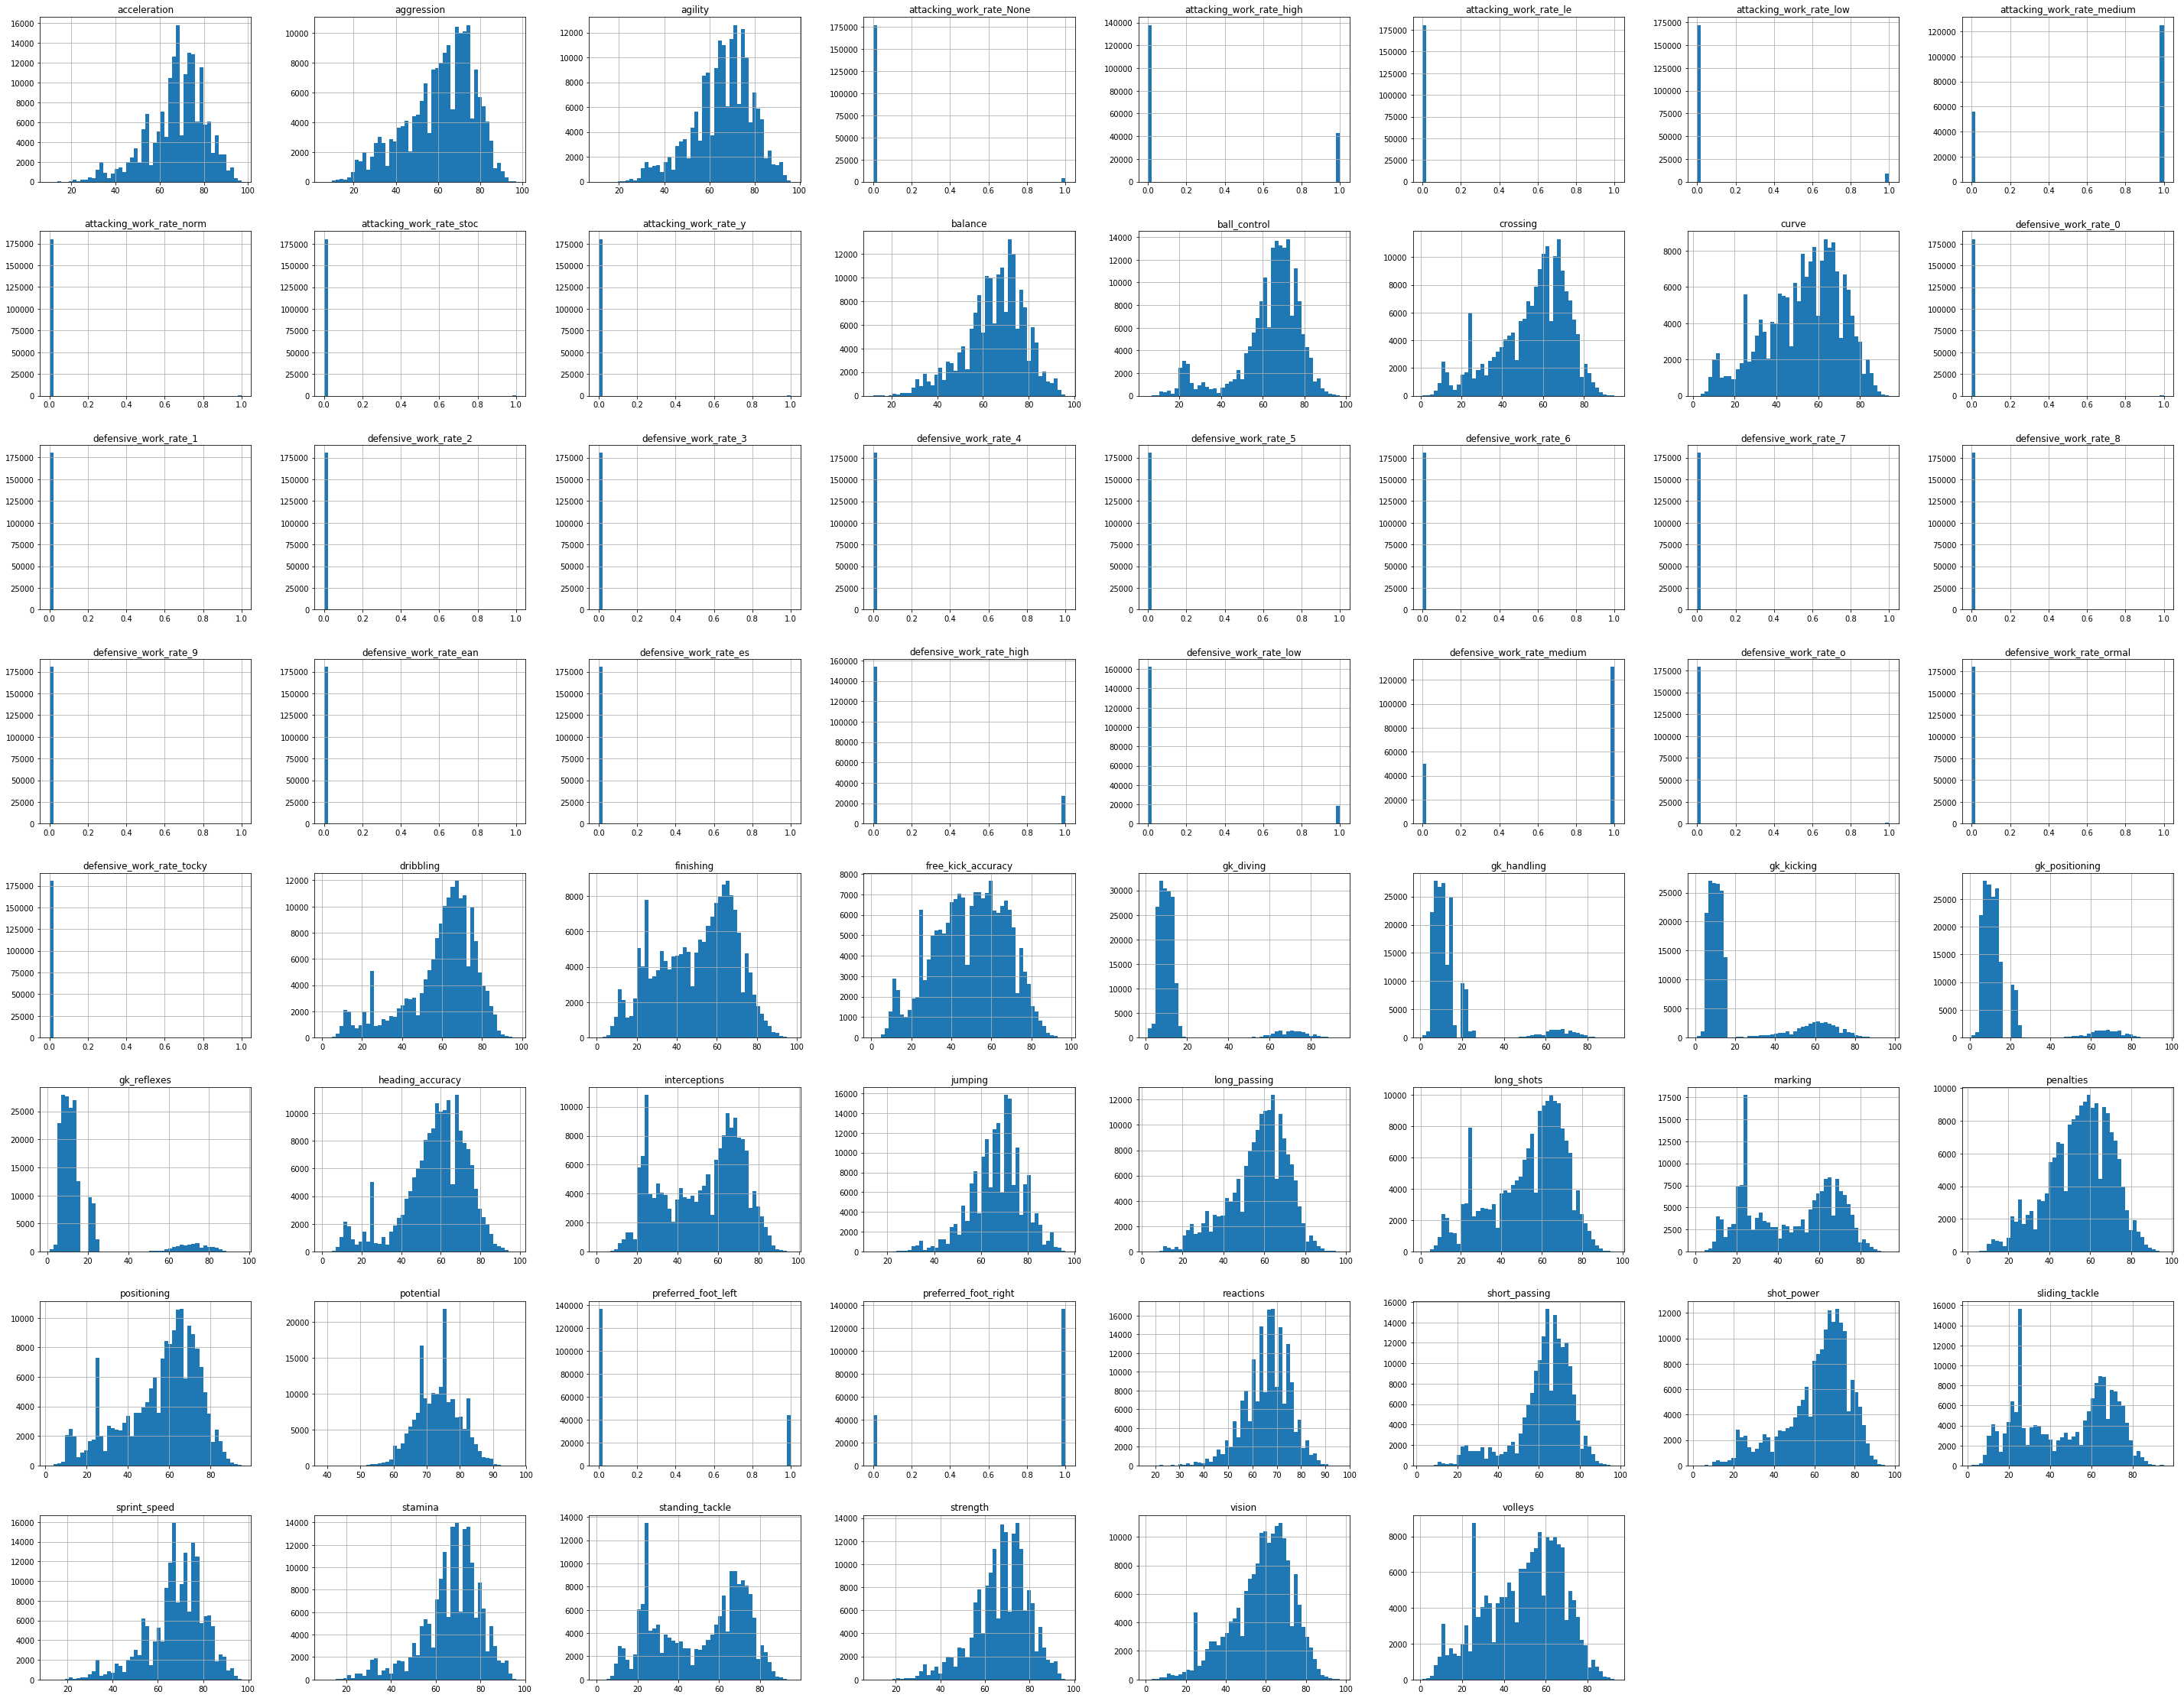

In [38]:
print("Distribution of Individual features in feature datafarme")
df_Features.hist(bins=50, figsize=(50,40))
plt.show()

In [39]:
# Distribution of Overall rating
print("Distribution of Target variable")
df_target.hist()
plt.xlabel("overall_rating")
plt.ylabel("frequency")
plt.show()

Distribution of Target variable


In [40]:
# graphical representation of relationship between overall fitting and other independemt features

# To form realtionship between overall fitting and other independemt features , concat the Feature dataframe and target datafrme
df_Basket_Ball=pd.concat([df_Features , df_target], axis=1)
df_Basket_Ball.head()

potential  crossing  finishing  heading_accuracy  short_passing  volleys  \
0       71.0      49.0       44.0              71.0           61.0     44.0   
1       71.0      49.0       44.0              71.0           61.0     44.0   
2       66.0      49.0       44.0              71.0           61.0     44.0   
3       65.0      48.0       43.0              70.0           60.0     43.0   
4       65.0      48.0       43.0              70.0           60.0     43.0   

   dribbling  curve  free_kick_accuracy  long_passing       ...        \
0       51.0   45.0                39.0          64.0       ...         
1       51.0   45.0                39.0          64.0       ...         
2       51.0   45.0                39.0          64.0       ...         
3       50.0   44.0                38.0          63.0       ...         
4       50.0   44.0                38.0          63.0       ...         

   defensive_work_rate_es  defensive_work_rate_high  defensive_work_rate_low  \
0                       0                         0                        0   
1                       0                         0                        0   
2                       0                         0                        0   
3                       0                         0                        0   
4                       0                         0                        0   

   defensive_work_rate_medium  defensive_work_rate_o  \
0                           1                      0   
1                           1                      0   
2                           1                      0   
3                           1                      0   
4                           1                      0   

   defensive_work_rate_ormal  defensive_work_rate_tocky  preferred_foot_left  \
0                          0                          0                    0   
1                          0                          0                    0   
2                          0                          0                    0   
3                          0                          0                    0   
4                          0                          0                    0   

   preferred_foot_right  overall_rating  
0                     1            67.0  
1                     1            67.0  
2                     1            62.0  
3                     1            61.0  
4                     1            61.0  

[5 rows x 63 columns]

In [41]:
# Columns of New structured dataframe
df_Basket_Ball.columns

Index(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'attacking_work_rate_None', 'attacking_work_rate_high',
       'attacking_work_rate_le', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'attacking_work_rate_norm',
       'attacking_work_rate_stoc', 'attacking_work_rate_y',
       'defensive_work_rate_0', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_rate_3',
       'defensive_work_rate_4', 'defensive_work_rate_5',
       'defensive_work_rate_6', 'defensive_work_r

In [42]:
# selection of dependent variable (x) for graphical analysis
df_Basket_Ball.columns[62]


'overall_rating'

In [43]:
# selection of in-dependent variable (y) for graphical analysis
df_Basket_Ball.columns[:-1]


Index(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'attacking_work_rate_None', 'attacking_work_rate_high',
       'attacking_work_rate_le', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'attacking_work_rate_norm',
       'attacking_work_rate_stoc', 'attacking_work_rate_y',
       'defensive_work_rate_0', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_rate_3',
       'defensive_work_rate_4', 'defensive_work_rate_5',
       'defensive_work_rate_6', 'defensive_work_r

In [44]:
# Visual represenation of overall fitting and other independemt features
fig, axs = plt.subplots(21, 3, sharey=False)
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[0], ax=axs[0][0], figsize=(60, 150), grid=True)
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[1], ax=axs[0][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[2], ax=axs[0][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[3], ax=axs[1][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[4], ax=axs[1][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[5], ax=axs[1][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[6], ax=axs[2][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[7], ax=axs[2][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[8], ax=axs[2][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[9], ax=axs[3][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[10], ax=axs[3][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[11], ax=axs[3][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[12], ax=axs[4][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[13], ax=axs[4][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[14], ax=axs[4][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[15], ax=axs[5][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[16], ax=axs[5][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[17], ax=axs[5][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[18], ax=axs[6][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[19], ax=axs[6][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[20], ax=axs[6][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[21], ax=axs[7][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[22], ax=axs[7][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[23], ax=axs[7][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[24], ax=axs[8][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[25], ax=axs[8][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[26], ax=axs[8][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[27], ax=axs[9][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[28], ax=axs[9][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[29], ax=axs[9][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[30], ax=axs[10][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[31], ax=axs[10][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[32], ax=axs[10][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[33], ax=axs[11][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[34], ax=axs[11][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[35], ax=axs[11][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[36], ax=axs[12][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[37], ax=axs[12][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[38], ax=axs[12][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[39], ax=axs[13][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[40], ax=axs[13][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[41], ax=axs[13][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[42], ax=axs[14][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[43], ax=axs[14][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[44], ax=axs[14][2])
                    

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[45], ax=axs[15][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[46], ax=axs[15][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[47], ax=axs[15][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[48], ax=axs[16][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[49], ax=axs[16][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[50], ax=axs[16][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[51], ax=axs[17][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[52], ax=axs[17][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[53], ax=axs[17][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[54], ax=axs[18][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[55], ax=axs[18][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[56], ax=axs[18][2])
                    
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[57], ax=axs[19][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[58], ax=axs[19][1])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[59], ax=axs[19][2])

df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[60], ax=axs[20][0])
df_Basket_Ball.plot(kind='scatter', x=df_Basket_Ball.columns[62], y=df_Basket_Ball.columns[61], ax=axs[20][1])
plt.show()
                    

<b> Train Test dataset split </b>

In [45]:
# To split the Feature and target dataset into Train & Test dataset , import  train_test_split form sklearn.model_selection
from sklearn.model_selection import train_test_split

In [46]:
# We are selecting 80:20 ration for train and test dataset
# shuffle paramter for shuffling the datasets before splitting
X_train, X_test , y_train , y_test = train_test_split(df_Features , df_target , test_size=0.2 , random_state=25 , shuffle=True)

In [47]:
# Details of Tarin and test dataset is :
print("The No. of rows in Features Training Dataset(X_train) is : {0}\n , No. of Columns in Features Training Dataset(X_train) is {1}:\
    ".format(X_train.shape[0],X_train.shape[1]),"\n")
print("The No. of rows in Target Training Dataset(y_train) is : {0}".format(y_train.shape[0]),"\n")

print("The No. of rows in Features Test Dataset(X_Test) is : {0}\n , No. of Columns in Features Training Dataset(X_Test) is {1}:\
    ".format(X_test.shape[0],X_test.shape[1]) , "\n")
print("The No. of rows in Target Test Dataset(y_test) is : {0}".format(y_test.shape[0]),"\n")

The No. of rows in Features Training Dataset(X_train) is : 144598
 , No. of Columns in Features Training Dataset(X_train) is 62:     

The No. of rows in Target Training Dataset(y_train) is : 144598 

The No. of rows in Features Test Dataset(X_Test) is : 36150
 , No. of Columns in Features Training Dataset(X_Test) is 62:     

The No. of rows in Target Test Dataset(y_test) is : 36150 



<p> Few definations related to Linear regression model
    
* Coefficient of Determination (R square) : it explains the proportion of variation in the dependent variable that is explained by the independent variables.

* Adjusted R square: Another parameter to explains the proportion of variation in the dependent variable based upon addition or removal of independent feature.adjusted R square will always be less than or equal to R square.

</p> 

<b> Fitting regression model </b>

In [48]:
# Apply linear regression model between Tagret and and independent features using Training dataset
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()

In [49]:
# fitting of Target and Features
reg_model.fit(X=X_train, y=y_train)
# Calculation for R^2 (R sqaure)
reg_model_R_square =reg_model.score(X=X_train, y=y_train) 
# Calculation for Predicted overall rating based upon features training dataset
y_pred_train = reg_model.predict(X=X_train)

In [50]:
print("The Coefficient of determination R^2 (R square) on Training Dataset : ",reg_model_R_square,"\n")
print("The Intercept Value for linear regression model is : " ,reg_model.intercept_ ,"\n")
print("The Predicted Overall rating based upon Features training dataset is (first 5 values):\n " ,y_pred_train[0:5] )

The Coefficient of determination R^2 (R square) on Training Dataset :  0.8442957482267206 

The Intercept Value for linear regression model is :  -3.4250522101142167 

The Predicted Overall rating based upon Features training dataset is (first 5 values):
  [64.49353994 68.67067468 80.49548172 74.67855599 58.68079802]


In [51]:
# Mapping Coeffient values with their features name
df_reg_model_Coef = pd.DataFrame(list(zip(X_train.columns , reg_model.coef_)) ,columns=['Features', 'Extimated coefficients'])
print("The Features with their coeffient values(first 5 rows)  are:")
df_reg_model_Coef.head(5)

The Features with their coeffient values(first 5 rows)  are:


Features  Extimated coefficients
0         potential                0.375909
1          crossing                0.023528
2         finishing                0.011899
3  heading_accuracy                0.069171
4     short_passing                0.051502

In [52]:
# Shape of Coefficient dataframe
print("The No. of rows are {0} , No. of columns are : {1}" . format(df_reg_model_Coef.shape[0],df_reg_model_Coef.shape[1]),"\n")
print("The Features are: ", list(df_reg_model_Coef['Features']),"\n")
print("The Coefficients are: ", list( df_reg_model_Coef['Extimated coefficients']))

The No. of rows are 62 , No. of columns are : 2 

The Features are:  ['potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'attacking_work_rate_None', 'attacking_work_rate_high', 'attacking_work_rate_le', 'attacking_work_rate_low', 'attacking_work_rate_medium', 'attacking_work_rate_norm', 'attacking_work_rate_stoc', 'attacking_work_rate_y', 'defensive_work_rate_0', 'defensive_work_rate_1', 'defensive_work_rate_2', 'defensive_work_rate_3', 'defensive_work_rate_4', 'defensive_work_rate_5', 'defensive_work_rate_6', 'defensive_work_rate_7', 'defensive_work_rate_8', 'd

In [53]:
# Scatterplot between Actual Target values ( overall rating ) and Predicted target (predicted overall rating) based on Training dataset
fig =plt.figure( figsize=(20,10))
sns.regplot(x=y_train, y=y_pred_train ,data=X_train) # searborn(sns).regplot for scatter plot between values and applying line of gooness fit
plt.xlabel("Overall_rating (actual)")
plt.ylabel("Overall_rating (Predicted)")
plt.title("Regression plot between Actual and Predicted variable using training dataset")
plt.show()

In [54]:
# Model Score predictions using Test Dataset
reg_model_R_square_Test= reg_model.score(X_test,y_test)
print("The Coefficient of determination R^2 (R square) on Test Dataset : ",reg_model_R_square_Test,"\n")

# Prediction of overall rating based upon Test data set
y_pred_test= reg_model.predict(X_test)


The Coefficient of determination R^2 (R square) on Test Dataset :  0.8440822364241701 



In [55]:
# Scatterplot between Actual Target values ( overall rating ) and Predicted target (predicted overall rating) based on Test dataset

fig =plt.figure( figsize=(20,10))
sns.regplot(x=y_test, y=y_pred_test ,data=X_test) # searborn(sns).regplot for scatter plot between values and applying line of gooness fit
plt.xlabel("Overall_rating (actual)")
plt.ylabel("Overall_rating (Predicted)")
plt.title("Regression plot between Actual and Predicted variable using Test dataset")
plt.show()

As we can see that , The line of goodness fit (regression line) is increasing upwards , for both training and test dataset,  as the data has been plot between player's actual overall rating and player's predicted rating return by regression model. 

<b> Evaluate Model Performance </b>

In [56]:
# To evaluate the model performance use of sklearn.metrics
import sklearn.metrics as metrics
import math # for mathematical operations

In [57]:
# Comaprison of Actual and Predicted Overall_rating on Training dataset
df_OverallRating_Train = pd.DataFrame({"Actual_rating":y_train,"Predicted_rating":reg_model.predict(X_train) })
df_OverallRating_Train.head()

Actual_rating  Predicted_rating
32468            68.0         64.493540
119782           70.0         68.670675
97182            84.0         80.495482
5148             78.0         74.678556
160377           58.0         58.680798

In [58]:
# Comaprison of Actual and Predicted Overall_rating on Test dataset
df_OverallRating_Test = pd.DataFrame({"Actual_rating":y_test,"Predicted_rating":reg_model.predict(X_test) })
df_OverallRating_Test.head()

Actual_rating  Predicted_rating
35648            72.0         69.582997
149508           64.0         65.886383
78892            75.0         74.404796
146598           62.0         67.110341
16419            68.0         69.020034

In [59]:
#Statiscal observation of Target variable (Overall_rating) on Training dataset
y_train.describe()

count    144598.000000
mean         68.614898
std           7.032370
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [60]:
#Statiscal observation of Target variable (Overall_rating) on Training dataset
y_test.describe()

count    36150.000000
mean        68.696238
std          7.018739
min         35.000000
25%         64.000000
50%         69.000000
75%         74.000000
max         94.000000
Name: overall_rating, dtype: float64

* Definitions

* Mean absolute error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.


* Mean squared error : Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. For every data point, you take the distance vertically from the point to the corresponding y value on the curve fit (the error), and square the value. Then you add up all those values for all data points, and, in the case of a fit with two parameters such as a linear fit, divide by the number of points minus two.** The squaring is done so negative values do not cancel positive values. The smaller the Mean Squared Error, the closer the fit is to the data. The MSE has the units squared of whatever is plotted on the vertical axis.


* Root Mean squared error : It is  measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. It is just the square root of the mean square error.

In [61]:
# Regression model evaluation on Training dataset


mean_absolute_error = metrics.mean_absolute_error(y_train,y_pred_train)

mean_sqaured_error = metrics.mean_squared_error(y_train,y_pred_train)

root_mean_sqaured_error = math.sqrt(mean_sqaured_error)

print('Mean Absolute Error on Training dataset:', mean_absolute_error)  
print('Mean Squared Error on Training dataset:', mean_sqaured_error)  
print('Root Mean Squared Error on Training dataset:', root_mean_sqaured_error) 

Mean Absolute Error on Training dataset: 2.1229821288177773
Mean Squared Error on Training dataset: 7.700179863804679
Root Mean Squared Error on Training dataset: 2.7749197941210264


In [62]:
# Regression model evaluation on Training dataset

mean_absolute_error_test = metrics.mean_absolute_error(y_test,y_pred_test)

mean_sqaured_error_test= metrics.mean_squared_error(y_test,y_pred_test)

root_mean_sqaured_error_test = math.sqrt(mean_sqaured_error_test)

print('Mean Absolute Error on Test dataset:', mean_absolute_error_test)  
print('Mean Squared Error on Test dataset:', mean_sqaured_error_test)  
print('Root Mean Squared Error on Test dataset:', root_mean_sqaured_error_test) 

Mean Absolute Error on Test dataset: 2.1188912884285664
Mean Squared Error on Test dataset: 7.68071773648262
Root Mean Squared Error on Test dataset: 2.771410784507165


It can be observed that ,RMSE ( root mean squared error) for Traget variable (predicted overall rating) is 2.77 which is less than 10% of mean ( i.e 68.62 for Training datset). Thus we can belive that our model performance is far good.


<b>Residual Plot</b> :Residual plots are  way to visualize the errors in your data.  If you have done a good job then your data should be randomly scattered around line zero.

In [63]:
fig= plt.figure(figsize=(20,15))
plt.scatter(reg_model.predict(X_train),reg_model.predict(X_train)-y_train , c='b',s=40, alpha=0.5 , )
plt.scatter(reg_model.predict(X_test),reg_model.predict(X_test)-y_test , c='r',s=40)
plt.hlines(y=0, xmin=30, xmax=100)
plt.title('Residual plot using training(blue) data and test (red) data')
plt.ylabel('Residuals')
plt.show()

As we can see that, Data for both training and test data randomly distributed around horizonal line , which is line zero. 

<b>Cross Validation Scores</b>


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Perform 10-fold cross validation using 
scores = cross_val_score(reg_model, df_Features, df_target, cv=10, scoring='neg_mean_squared_error')

print("Cross-validated scores:", scores , "\n")
print("Mean Cross-validated score:", scores.mean(),"\n")
print("Standard deviation of scores:", scores.std())

Cross-validated scores: [-7.79859954 -7.59693648 -7.63585198 -7.75761485 -7.53126618 -8.16662468
 -7.57098488 -7.79052294 -7.88275799 -7.72442389] 

Mean Cross-validated score: -7.745558340459236 

Standard deviation of scores: 0.17665468479697427


<b> Fine tuning of model </b>

Note :
* Multicollinearity:  When the independent variables in my model are highly linearly related then such a situation is called multicollinearity. An ideal Linear regression problem should not have multicollinearity in between of features.multicollinearity increases the estimate of standard error of regression coefficients which makes some variables statistically insignificant when they should be significant.

There are several way to detect multicolinearity one is : VIF : Variance inflation factor and second is correlation method

* Correlation Method: By calculating the correlation coefficients between the variables we can get to know about the extent of multicollinearity in the data

* VIF (Variance Inflation Factor) Method : Variance inflation factor (VIF) for an explanatory variable is given 1/(1-R^2 )  . Here, we take that particular X as response variable and all other explanatory variables as independent variables. So, we run a regression between one of those explanatory variables with remaining explanatory variables.VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables.

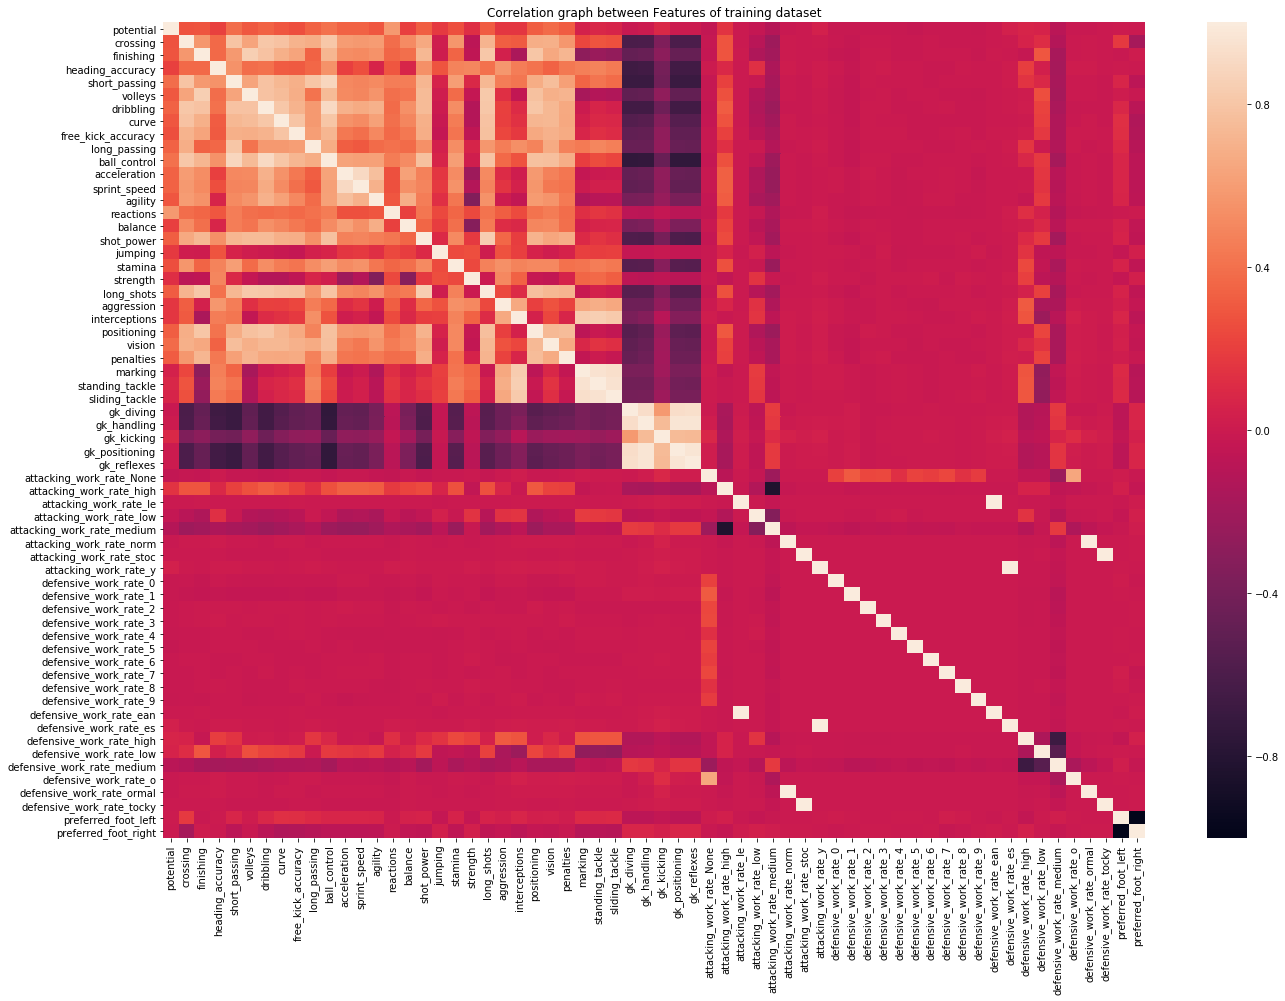

In [65]:
# Correlation graph between Features of training dataset

plt.figure(figsize=(22,15))
plt.title('Correlation graph between Features of training dataset')
sns.heatmap(X_train.corr())

In [66]:
# VIF To check for multi-collinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor # to import variance inflation factor from sklearn module

In [67]:
# Calculation of VIF (variance Inflation Factor)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_Features.values, i) for i in range(df_Features.shape[1])]
vif["features"] = df_Features.columns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [68]:
vif.head()

VIF Factor          features
0    2.155266         potential
1    4.941216          crossing
2    7.166564         finishing
3    4.223800  heading_accuracy
4    8.916421     short_passing

In [69]:
#Selection of unique VIF Factor values
vif['VIF Factor'].unique()

array([ 2.15526618,  4.94121628,  7.16656381,  4.22379964,  8.91642131,
        5.25729032,  9.94691865,  4.97169139,  3.74793979,  4.30520096,
       13.5188982 ,  7.51268734,  6.32037312,  4.02599867,  2.29088651,
        2.43937757,  4.66244605,  1.50093086,  2.74841479,  2.40230727,
        6.57787814,  2.86627764,  4.80282058,  4.99054424,  4.09280137,
        3.17068782, 13.18000346, 18.05431465, 13.00212944, 14.14599202,
       21.56164121,  4.10671858, 21.94177913, 24.16143032,         inf])

In [85]:
# Selection of VIF values and features which are greater than 25 and have inf (infinite } as values )
vif[vif['VIF Factor']>25]

VIF Factor                    features
34         inf    attacking_work_rate_None
35         inf    attacking_work_rate_high
36         inf      attacking_work_rate_le
37         inf     attacking_work_rate_low
38         inf  attacking_work_rate_medium
39         inf    attacking_work_rate_norm
40         inf    attacking_work_rate_stoc
41         inf       attacking_work_rate_y
42         inf       defensive_work_rate_0
43         inf       defensive_work_rate_1
44         inf       defensive_work_rate_2
45         inf       defensive_work_rate_3
46         inf       defensive_work_rate_4
47         inf       defensive_work_rate_5
48         inf       defensive_work_rate_6
49         inf       defensive_work_rate_7
50         inf       defensive_work_rate_8
51         inf       defensive_work_rate_9
52         inf     defensive_work_rate_ean
53         inf      defensive_work_rate_es
54         inf    defensive_work_rate_high
55         inf     defensive_work_rate_low
56         inf  defensive_work_rate_medium
57         inf       defensive_work_rate_o
58         inf   defensive_work_rate_ormal
59         inf   defensive_work_rate_tocky
60         inf         preferred_foot_left
61         inf        preferred_foot_right

As stated VIF defines the correlation factor between features. thus inorder ot remove the colinearity , removal of those features from dataset is required. 

In [87]:
# Select of features which have high correlated value

vif[vif['VIF Factor']>25]['features'].tolist()

['attacking_work_rate_None',
 'attacking_work_rate_high',
 'attacking_work_rate_le',
 'attacking_work_rate_low',
 'attacking_work_rate_medium',
 'attacking_work_rate_norm',
 'attacking_work_rate_stoc',
 'attacking_work_rate_y',
 'defensive_work_rate_0',
 'defensive_work_rate_1',
 'defensive_work_rate_2',
 'defensive_work_rate_3',
 'defensive_work_rate_4',
 'defensive_work_rate_5',
 'defensive_work_rate_6',
 'defensive_work_rate_7',
 'defensive_work_rate_8',
 'defensive_work_rate_9',
 'defensive_work_rate_ean',
 'defensive_work_rate_es',
 'defensive_work_rate_high',
 'defensive_work_rate_low',
 'defensive_work_rate_medium',
 'defensive_work_rate_o',
 'defensive_work_rate_ormal',
 'defensive_work_rate_tocky',
 'preferred_foot_left',
 'preferred_foot_right']

In [88]:
# Assign columns to remove from features daaframe
cols_to_remove= vif[vif['VIF Factor']>25]['features'].tolist()

In [89]:
# Existing columns in features dataframe
df_Features.columns

Index(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'attacking_work_rate_None', 'attacking_work_rate_high',
       'attacking_work_rate_le', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'attacking_work_rate_norm',
       'attacking_work_rate_stoc', 'attacking_work_rate_y',
       'defensive_work_rate_0', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_rate_3',
       'defensive_work_rate_4', 'defensive_work_rate_5',
       'defensive_work_rate_6', 'defensive_work_r

In [90]:
# removal of columns from features dataframe and form a new datafrme 

df_Features_New = df_Features.drop(columns=cols_to_remove, axis=1)
df_Features_New.head()

potential  crossing  finishing  heading_accuracy  short_passing  volleys  \
0       71.0      49.0       44.0              71.0           61.0     44.0   
1       71.0      49.0       44.0              71.0           61.0     44.0   
2       66.0      49.0       44.0              71.0           61.0     44.0   
3       65.0      48.0       43.0              70.0           60.0     43.0   
4       65.0      48.0       43.0              70.0           60.0     43.0   

   dribbling  curve  free_kick_accuracy  long_passing     ...       vision  \
0       51.0   45.0                39.0          64.0     ...         54.0   
1       51.0   45.0                39.0          64.0     ...         54.0   
2       51.0   45.0                39.0          64.0     ...         54.0   
3       50.0   44.0                38.0          63.0     ...         53.0   
4       50.0   44.0                38.0          63.0     ...         53.0   

   penalties  marking  standing_tackle  sliding_tackle  gk_diving  \
0       48.0     65.0             69.0            69.0        6.0   
1       48.0     65.0             69.0            69.0        6.0   
2       48.0     65.0             66.0            69.0        6.0   
3       47.0     62.0             63.0            66.0        5.0   
4       47.0     62.0             63.0            66.0        5.0   

   gk_handling  gk_kicking  gk_positioning  gk_reflexes  
0         11.0        10.0             8.0          8.0  
1         11.0        10.0             8.0          8.0  
2         11.0        10.0             8.0          8.0  
3         10.0         9.0             7.0          7.0  
4         10.0         9.0             7.0          7.0  

[5 rows x 34 columns]

## <b> Refiiting of data into  Regression model </b>

<b> Train Test dataset split <b>

In [91]:
# Independent features for regression model
df_Features_New.columns

Index(['potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [92]:
# dependent features for regression model
df_target.name

'overall_rating'

In [93]:
# Split the data into ratio of 80:20 for Train and test data

X_train_new , X_test_new, y_train_new ,y_test_new = train_test_split(df_Features_New , df_target , test_size=0.2 , random_state=25 , shuffle=True)

In [94]:
# Details of Tarin and test dataset is :
print("The No. of rows in Features Training Dataset(X_train) is : {0}\n , No. of Columns in Features Training Dataset(X_train) is {1}:\
    ".format(X_train_new.shape[0],X_train_new.shape[1]),"\n")
print("The No. of rows in Target Training Dataset(y_train) is : {0}".format(y_train_new.shape[0]),"\n")

print("The No. of rows in Features Test Dataset(X_Test) is : {0}\n , No. of Columns in Features Training Dataset(X_Test) is {1}:\
    ".format(X_test_new.shape[0],X_test_new.shape[1]) , "\n")
print("The No. of rows in Target Test Dataset(y_test) is : {0}".format(y_test_new.shape[0]),"\n")

The No. of rows in Features Training Dataset(X_train) is : 144598
 , No. of Columns in Features Training Dataset(X_train) is 34:     

The No. of rows in Target Training Dataset(y_train) is : 144598 

The No. of rows in Features Test Dataset(X_Test) is : 36150
 , No. of Columns in Features Training Dataset(X_Test) is 34:     

The No. of rows in Target Test Dataset(y_test) is : 36150 



<b> Fitting of regression model </b>

In [95]:
# Apply linear regression model between Tagret and and independent features using Training dataset
from sklearn.linear_model import LinearRegression
reg_model_new = LinearRegression()

In [96]:
# fitting of Target and Features
reg_model_new.fit(X=X_train_new, y=y_train_new)
# Calculation for R^2 (R sqaure)
reg_model_new_R_square =reg_model_new.score(X=X_train_new, y=y_train_new) 
# Calculation for Predicted overall rating based upon features training dataset
y_pred_train_new = reg_model_new.predict(X=X_train_new)

In [97]:
print("The Coefficient of determination R^2 (R square) on Training Dataset : ",reg_model_new_R_square,"\n")
print("The Intercept Value for linear regression model is : " ,reg_model_new.intercept_ ,"\n")
print("The Predicted Overall rating based upon Features training dataset is (first 5 values):\n " ,y_pred_train_new[0:5] )

The Coefficient of determination R^2 (R square) on Training Dataset :  0.8416105088743506 

The Intercept Value for linear regression model is :  -3.596436662986619 

The Predicted Overall rating based upon Features training dataset is (first 5 values):
  [64.45268937 68.75716986 80.85518577 74.95568107 58.80716047]


In [98]:
# Mapping Coeffient values with their features name
df_reg_model_new_Coef = pd.DataFrame(list(zip(X_train_new.columns , reg_model_new.coef_)) ,columns=['Features', 'Extimated coefficients(new)'])
print("The Features with their coeffient values(first 5 rows)  are:")
df_reg_model_new_Coef.head(5)

The Features with their coeffient values(first 5 rows)  are:


Features  Extimated coefficients(new)
0         potential                     0.378422
1          crossing                     0.022535
2         finishing                     0.011468
3  heading_accuracy                     0.070148
4     short_passing                     0.050381

In [99]:
# Scatterplot between Actual Target values ( overall rating ) and Predicted target (predicted overall rating) based on Training dataset
fig =plt.figure( figsize=(20,10))
sns.regplot(x=y_train_new, y=y_pred_train_new ,data=X_train_new) # searborn(sns).regplot for scatter plot between values and applying line of gooness fit
plt.xlabel("Overall_rating (actual)")
plt.ylabel("Overall_rating (Predicted)")
plt.title("Regression plot between Actual and Predicted variable using training dataset after refitting of data")
plt.show()

In [100]:
# Model Score predictions using Test Dataset
reg_model_new_R_square_Test= reg_model_new.score(X_test_new,y_test_new)
print("The Coefficient of determination R^2 (R square) on Test Dataset : ",reg_model_new_R_square_Test,"\n")

# Prediction of overall rating based upon Test data set
y_pred_test_new= reg_model_new.predict(X_test_new)


The Coefficient of determination R^2 (R square) on Test Dataset :  0.8417717863952626 



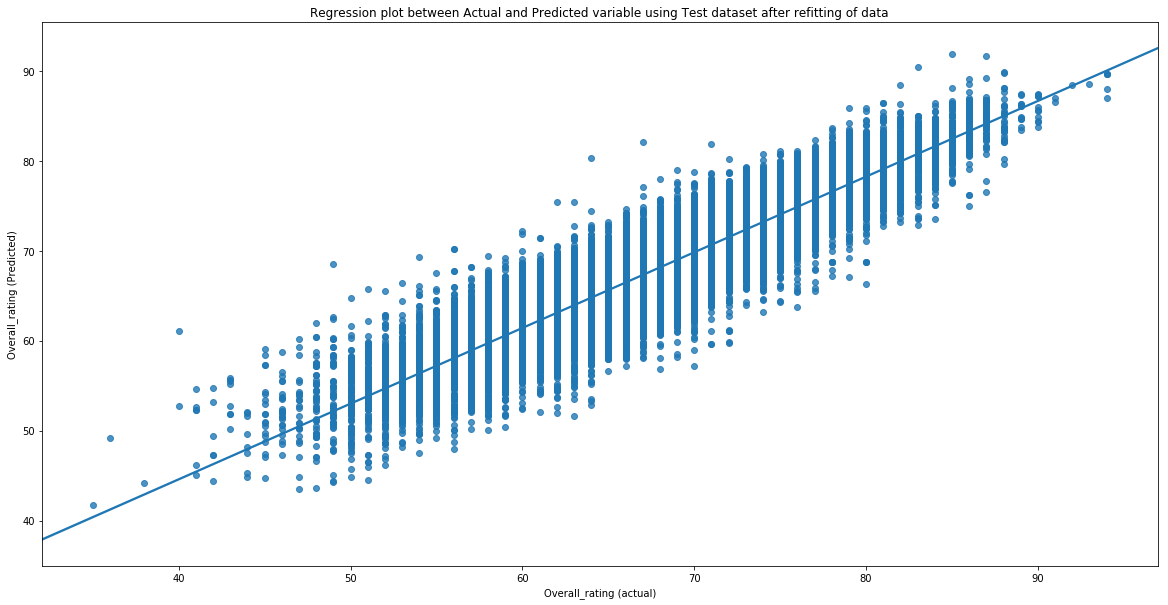

In [101]:
# Scatterplot between Actual Target values ( overall rating ) and Predicted target (predicted overall rating) based on Test dataset

fig =plt.figure( figsize=(20,10))
sns.regplot(x=y_test_new, y=y_pred_test_new ,data=X_test_new) # searborn(sns).regplot for scatter plot between values and applying line of gooness fit
plt.xlabel("Overall_rating (actual)")
plt.ylabel("Overall_rating (Predicted)")
plt.title("Regression plot between Actual and Predicted variable using Test dataset after refitting of data")
plt.show()

<b> Evaluate Model Performance </b>

In [102]:
# Regression model evaluation on Training dataset


mean_absolute_error_new = metrics.mean_absolute_error(y_train_new,y_pred_train_new)

mean_sqaured_error_new = metrics.mean_squared_error(y_train_new,y_pred_train_new)

root_mean_sqaured_error_new = math.sqrt(mean_sqaured_error_new)

print('Mean Absolute Error on Training dataset:', mean_absolute_error_new)  
print('Mean Squared Error on Training dataset:', mean_sqaured_error_new)  
print('Root Mean Squared Error on Training dataset:', root_mean_sqaured_error_new) 

Mean Absolute Error on Training dataset: 2.139740953749514
Mean Squared Error on Training dataset: 7.832975376805333
Root Mean Squared Error on Training dataset: 2.7987453218907454


In [103]:
# Regression model evaluation on Training dataset

mean_absolute_error_test_new = metrics.mean_absolute_error(y_test_new,y_pred_test_new)

mean_sqaured_error_test_new= metrics.mean_squared_error(y_test_new,y_pred_test_new)

root_mean_sqaured_error_test_new = math.sqrt(mean_sqaured_error_test_new)

print('Mean Absolute Error on Test dataset:', mean_absolute_error_test_new)  
print('Mean Squared Error on Test dataset:', mean_sqaured_error_test_new)  
print('Root Mean Squared Error on Test dataset:', root_mean_sqaured_error_test_new) 

Mean Absolute Error on Test dataset: 2.1338605913728257
Mean Squared Error on Test dataset: 7.794533597544893
Root Mean Squared Error on Test dataset: 2.7918691942039287


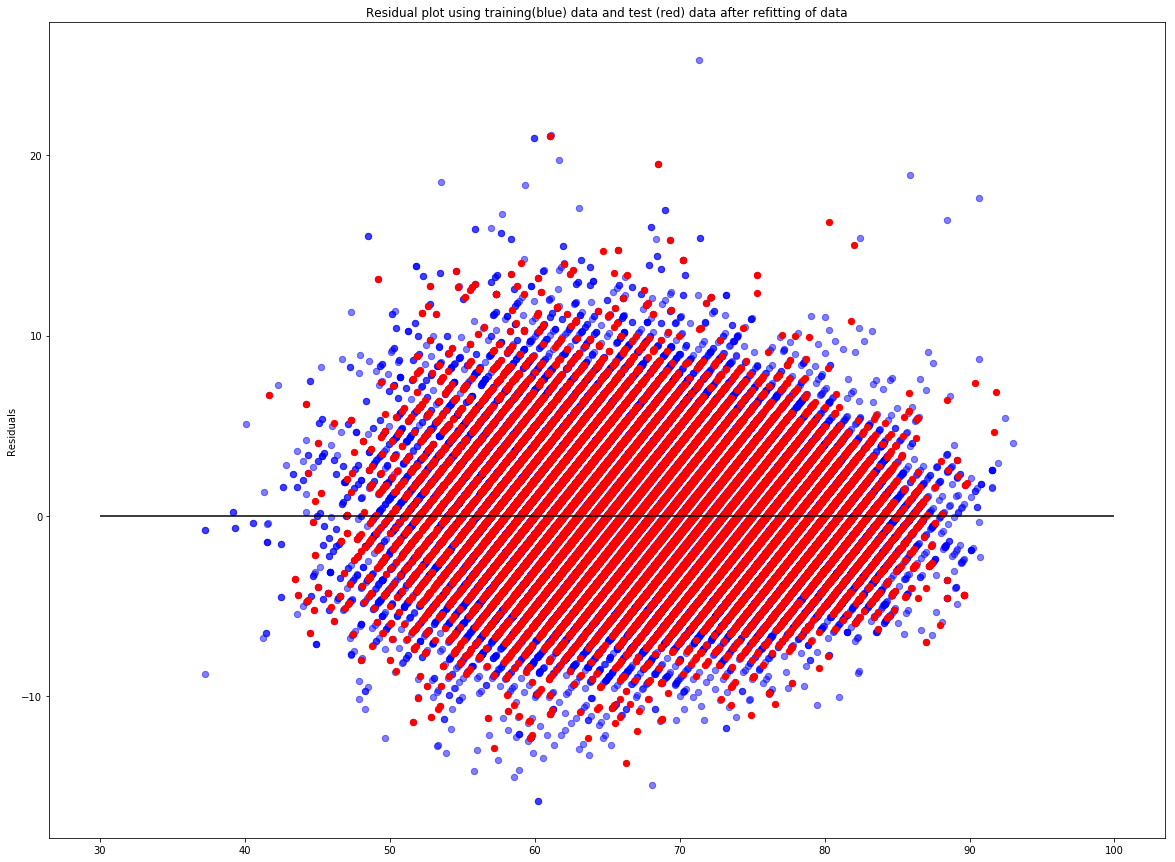

In [104]:
# Residual plot after refitting of data
fig= plt.figure(figsize=(20,15))
plt.scatter(reg_model_new.predict(X_train_new),reg_model_new.predict(X_train_new)-y_train_new , c='b',s=40, alpha=0.5 , )
plt.scatter(reg_model_new.predict(X_test_new),reg_model_new.predict(X_test_new)-y_test_new , c='r',s=40)
plt.hlines(y=0, xmin=30, xmax=100)
plt.title('Residual plot using training(blue) data and test (red) data after refitting of data')
plt.ylabel('Residuals')
plt.show()

As We can see that ,  There is very less changes in Coefficient of determination(R^2) ,  which explains the proportion of variation in the dependent variable that is explained by the independent variables.
The Values of R^2 lies around 84 % before and after re-fitting of data. Also their is very less difference between Mean absolute error and rootmean sqaured error after and before re-fitting of data 



Thus we can predict that our model is giving 84% accurate results.

<b> Fitting of Data using StatsModel </b>

In [108]:
# Data with Individual features and target features 

print("Data with Individual features (Training data)")
X_train_new.head(2)


Data with Individual features (Training data)


potential  crossing  finishing  heading_accuracy  short_passing  \
32468        69.0      18.0       15.0              15.0           12.0   
119782       74.0      68.0       71.0              57.0           66.0   

        volleys  dribbling  curve  free_kick_accuracy  long_passing  \
32468      12.0       16.0   11.0                13.0          14.0   
119782     62.0       74.0   71.0                35.0          53.0   

           ...       vision  penalties  marking  standing_tackle  \
32468      ...         17.0       15.0     13.0             12.0   
119782     ...         61.0       56.0     25.0             32.0   

        sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  \
32468             13.0       70.0         67.0        54.0            68.0   
119782            25.0        7.0          9.0         7.0             5.0   

        gk_reflexes  
32468          73.0  
119782          9.0  

[2 rows x 34 columns]

In [109]:
print("Data with Target features (Training data)")
y_train_new.head(2)


Data with Target features (Training data)


32468     68.0
119782    70.0
Name: overall_rating, dtype: float64

In [110]:
print("Data with Individual features (Test data)")
X_test_new.head(2)


Data with Individual features (Test data)


potential  crossing  finishing  heading_accuracy  short_passing  \
35648        72.0      70.0       66.0              61.0           65.0   
149508       65.0      62.0       54.0              56.0           70.0   

        volleys  dribbling  curve  free_kick_accuracy  long_passing  \
35648      56.0       75.0   61.0                54.0          59.0   
149508     46.0       64.0   68.0                55.0          64.0   

           ...       vision  penalties  marking  standing_tackle  \
35648      ...         64.0       65.0     25.0             40.0   
149508     ...         65.0       61.0     61.0             59.0   

        sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  \
35648             37.0       10.0         16.0        11.0            11.0   
149508            54.0       13.0         15.0        15.0             5.0   

        gk_reflexes  
35648           8.0  
149508          7.0  

[2 rows x 34 columns]

In [112]:
print("Data with Target features (Test data)")
y_test_new.head(2)

Data with Target features (Test data)


35648     72.0
149508    64.0
Name: overall_rating, dtype: float64

<b> Fittinng data using Statsmodel api</b>

In [113]:
import statsmodels.api as Stats

In [114]:

X_train_new = Stats.add_constant(X_train_new) # Adding Intercept using add_constant () methond of statsmodel for linear regression
X_train_new.head(2)

const  potential  crossing  finishing  heading_accuracy  \
32468     1.0       69.0      18.0       15.0              15.0   
119782    1.0       74.0      68.0       71.0              57.0   

        short_passing  volleys  dribbling  curve  free_kick_accuracy  \
32468            12.0     12.0       16.0   11.0                13.0   
119782           66.0     62.0       74.0   71.0                35.0   

           ...       vision  penalties  marking  standing_tackle  \
32468      ...         17.0       15.0     13.0             12.0   
119782     ...         61.0       56.0     25.0             32.0   

        sliding_tackle  gk_diving  gk_handling  gk_kicking  gk_positioning  \
32468             13.0       70.0         67.0        54.0            68.0   
119782            25.0        7.0          9.0         7.0             5.0   

        gk_reflexes  
32468          73.0  
119782          9.0  

[2 rows x 35 columns]

In [115]:
# Fitting of data using OLS (ordinary least sqaure method)
reg_model_OLS = Stats.OLS(endog=y_train_new , exog=X_train_new , hasconst=True).fit()
# Prediction of Overall rating return by Regression model
y_pred_OLS=reg_model_OLS.predict(X_train_new)

In [116]:
print(reg_model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 2.259e+04
Date:                Mon, 22 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:58:32   Log-Likelihood:            -3.5399e+05
No. Observations:              144598   AIC:                         7.081e+05
Df Residuals:                  144563   BIC:                         7.084e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5964      0

In [121]:
print("The Coefficient of determination R^2 (R square) on Training Dataset(OLS model) : ",reg_model_OLS.rsquared,"\n")

print("The Predicted Overall rating based upon Features training dataset is (first 5 values) (OLS model):\n " )
y_pred_OLS[0:5]

The Coefficient of determination R^2 (R square) on Training Dataset(OLS model) :  0.8416105088743506 

The Predicted Overall rating based upon Features training dataset is (first 5 values) (OLS model):
 


32468     64.452689
119782    68.757170
97182     80.855186
5148      74.955681
160377    58.807160
dtype: float64

As, We can see that when model is fitted with OLS method from Statsmodel, again it's Coefficient of determination is returning as 84%

## <b> Fitting of data using Decision tree model</b>

In [122]:
# laod Decision tree using Sklearn.tree
from sklearn.tree import DecisionTreeRegressor

In [124]:
# Calling of DecisionTreeReegressor model
decision_tree_model = DecisionTreeRegressor()
#Fitting of Data into model (training data)
decision_tree_model.fit(X=X_train_new , y=y_train_new)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [125]:
# Prediction of overall rating 
y_pred_dec_tree = decision_tree_model.predict(X_train_new)
print("Predicted overall ratings : (first 5 rows)")
y_pred_dec_tree[0:5]

Predicted overall ratings : (first 5 rows)


array([68., 70., 84., 78., 58.])

In [127]:
# Accuracy of Decision tree model 
dec_tree_Accuracy_score =decision_tree_model.score(X=X_train_new , y=y_train_new)
print("Accuracy of Decision Treemodel to Predict Rating of players")
dec_tree_Accuracy_score*100

Accuracy of Decision Treemodel to Predict Rating of players


99.9253493139095

As we can see that, Decision tree model has predicted more accuracy (99%) , whereas Linear regression model has predicted accuracy of 84% in both test and Statsmodel.